In [4]:
import numpy as np
import pandas as pd
import scipy.optimize as fit
import astropy.io.fits
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.table import Table

In [5]:
#Reading in the data as a table.
data = Table.read('PSFOUT_EDR.fits')
data

<Table length=16819>
     TARGETID     LASTNIGHT SPGRPVAL ... TSNR2_LRG ZCAT_NSPEC ZCAT_PRIMARY
      int64         int32    int32   ...  float32    int16        bool    
----------------- --------- -------- ... --------- ---------- ------------
  996118271885313  20210411 20210411 ...   576.329          2         True
39627728013497533  20210506 20210506 ...  88.53483          1         True
39627728021882029  20210506 20210506 ...  94.60718          1         True
39627728021885842  20210506 20210506 ...  85.19972          1         True
39627733931655280  20210508 20210508 ...  84.66109          1         True
39627733931658872  20210503 20210503 ...  89.73417          1         True
39627733940045468  20210503 20210503 ...  93.88077          3        False
39627733940046516  20210508 20210508 ... 91.516426          1         True
39627733940046601  20210503 20210503 ...  93.93428          1         True
39627733986184501  20210412 20210412 ...  90.22981          1         True
              ...       ...      ... ...       ...        ...          ...
39633465875891273  20210508 20210508 ... 17.209301          1         True
39633465880088249  20210430 20210430 ... 18.652979          1         True
39633465884280245  20210420 20210420 ... 16.577866          2        False
39633465884280802  20210420 20210420 ... 16.878693          2        False
39633465896861978  20210428 20210428 ... 21.480846          1         True
39633468199537651  20210419 20210419 ... 19.125042          1         True
39633468203731250  20210414 20210414 ... 4.6599383          3        False
39633468203732437  20210428 20210428 ... 24.307608          1         True
39633468212118435  20210430 20210430 ... 19.238285          2         True
39633468212118437  20210416 20210416 ... 13.973689          1         True

In [6]:
# Filtering out everything not classified as a galaxy, anything with a DELTACHI2 < 100,
# and z values that are not <<1. Hubble's Law does not work with values very close to 1, or rather not <<1.

In [7]:
data1 = data[(data['SPECTYPE'] == 'GALAXY') & (data['DELTACHI2'] > 100) & (data['Z'] < abs(0.009)) & (data['Z'] > 0.0) & (data['PARALLAX'] == 0)]
data1

<Table length=36>
     TARGETID     LASTNIGHT SPGRPVAL ... TSNR2_LRG  ZCAT_NSPEC ZCAT_PRIMARY
      int64         int32    int32   ...  float32     int16        bool    
----------------- --------- -------- ... ---------- ---------- ------------
39627752122358160  20210513 20210513 ...  111.33307          1         True
39627752155908293  20210419 20210419 ...   63.54392          1         True
39627758095045526  20210513 20210513 ...  117.98552          1         True
39627758157960676  20210513 20210513 ...  120.61481          1         True
39627758183121900  20210506 20210506 ...  117.99909          1         True
39627764147421241  20210513 20210513 ...   138.0567          1         True
39627764180981559  20210506 20210506 ...  131.00224          1         True
39627764277450494  20210504 20210504 ...  106.33136          1         True
39627770258523852  20210513 20210513 ...  104.21829          1         True
39627770321437037  20210419 20210419 ...   131.7201          1         True
              ...       ...      ... ...        ...        ...          ...
39627847618265806  20210417 20210417 ...  120.77655          2         True
39627854807306086  20210502 20210502 ...   98.82211          1         True
39627854811496580  20210406 20210406 ...  109.73065          1         True
39627860872266969  20210417 20210417 ...  110.30432          1         True
39627860880657548  20210417 20210417 ...   125.6254          2         True
39627866907870908  20210502 20210502 ...   99.89331          2         True
39627884834330547  20210407 20210407 ...  101.99971          1         True
39627890874123116  20210503 20210503 ... 110.485466          1         True
39627902957915146  20210502 20210502 ...  197.53189          2         True
39633411328970437  20210518 20210518 ...  83.677124          1         True

In [8]:
data2 = data1['TARGETID', 'SPECTYPE', 'NPIXELS', 'Z', 'ZERR']
data2

<Table length=36>
     TARGETID     SPECTYPE NPIXELS           Z                     ZERR         
      int64        bytes6   int64         float64                float64        
----------------- -------- ------- ---------------------- ----------------------
39627752122358160   GALAXY    7791  9.848610080699924e-06  4.744497697145299e-05
39627752155908293   GALAXY    7920  0.0005549870165812103 5.0131814033200613e-05
39627758095045526   GALAXY    7680 0.00031338234541118643  7.072516786351067e-05
39627758157960676   GALAXY    7784  0.0004200232497779948  7.610479105784843e-05
39627758183121900   GALAXY    7865 0.00022556209718951718  5.678936900108884e-05
39627764147421241   GALAXY    7835 0.00025588435161178223  4.284703084005745e-05
39627764180981559   GALAXY    7857 0.00015772597462269545  6.498340367297116e-05
39627764277450494   GALAXY    7922 0.00023195622143032908   4.99423930973428e-05
39627770258523852   GALAXY    7818  0.0002402917185593181 0.00012786466127406274
39627770321437037   GALAXY    7922  0.0008265055491348287  7.540186649581606e-05
              ...      ...     ...                    ...                    ...
39627847618265806   GALAXY    7927 0.00031735539078704954  4.181927709547946e-05
39627854807306086   GALAXY    7921 0.00029212053854488316  8.314655847737825e-05
39627854811496580   GALAXY    7793   0.000455603115609714  7.261250233631129e-05
39627860872266969   GALAXY    7929  3.085022283555685e-05 0.00010249875001778218
39627860880657548   GALAXY    7929 0.00030369004990895627  7.642926794118063e-05
39627866907870908   GALAXY    7920 0.00020107132469313193  5.334508856242773e-05
39627884834330547   GALAXY    7925  9.847174229064087e-06  7.584985065812991e-05
39627890874123116   GALAXY    7812 0.00017766394937917255  4.911132732572933e-05
39627902957915146   GALAXY    7841  6.855555495323095e-05  4.564562943248004e-05
39633411328970437   GALAXY    7872 3.2382507170241286e-05  6.192322253348778e-05

In [9]:
print(data2.info(['attributes', 'stats']))

<Table length=36>
  name    dtype      mean        std         min         max    
-------- ------- ----------- ----------- ----------- -----------
TARGETID   int64  3.9628e+16 9.21806e+11 3.96278e+16 3.96334e+16
SPECTYPE  bytes6          --          --          --          --
 NPIXELS   int64     7861.89     65.6793        7680        7929
       Z float64 0.000279187 0.000227326 9.84717e-06 0.000975236
    ZERR float64 6.81706e-05 2.14908e-05 3.69119e-05 0.000127865
None


In [10]:
#Model; Calculating the distance and recession velocity for each galaxy from the filtered data:

actual_size_of_galaxy = 22 #kiloparsecs
distances = []
recession_velocity_list = []
recession_velocity_error_list = []
c = 299792.458 #km/s 

for i in range(len(data2['TARGETID'])):
    pixels = data2['NPIXELS'][i]
#     print(pixels)
#     Each pixel on a screen is ~1.18 arcseconds
    arcseconds = pixels * 1.18
#     print(arcseconds, 'arcsec')
    theta = arcseconds * (0.00484814/11800) #miliradians; observed angular size of the galaxy
#     print(theta, 'milirad')
    distance = actual_size_of_galaxy / theta
#     print(distance, 'Mpc')
    distances.append(distance) #Makes a list with all the distance values.
    #Hubble's Law: v = z*c; c = speed of light (299,792,458 m/s)
    recession_velocity = (data2['Z'][i]) * (c)
    recession_velocity_error = (data2['ZERR'][i]) *(c)
    recession_velocity_list.append(recession_velocity)
    recession_velocity_error_list.append(recession_velocity_error)
    i = i + 1
# print(distances, 'Mpc')
# print(recession_velocity_list, 'km/s')

dictionary = {'distances':distances, 'recession velocity': recession_velocity_list, 
              'recession velocity error':recession_velocity_error_list}
df = pd.DataFrame(data = (dictionary), columns = ('distances', 'recession velocity', 'recession velocity error'))
df

distances  recession velocity  recession velocity error
0   5824.441988            2.952539                 14.223646
1   5729.574183          166.380922                 15.029140
2   5908.623376           93.949664                 21.202872
3   5829.679795          125.919802                 22.815642
4   5769.641135           67.621816                 17.025025
5   5791.732933           76.712199                 12.845217
6   5775.515785           47.285058                 19.481534
7   5728.127686           69.538726                 14.972353
8   5804.326877           72.037645                 38.332861
9   5728.127686          247.780130                 22.604911
10  5826.685609           33.881832                 18.015177
11  5792.472240          292.368359                 18.229155
12  5728.127686           67.338700                 28.796066
13  5827.433868           67.967204                 11.065914
14  5723.792574           54.363497                 23.531373
15  5828.182318           86.917913                 36.818107
16  5818.467435          245.981620                 16.415268
17  5815.484753           49.820136                 21.107832
18  5814.739560           62.336493                 12.596197
19  5834.927032           16.153254                 21.152371
20  5727.404711          158.023954                 18.950685
21  5727.404711           30.143108                 15.878430
22  5724.514637          154.380007                 18.038762
23  5725.959309           35.567217                 20.603250
24  5725.959309           46.679368                 29.532150
25  5733.918060           74.682696                 27.892293
26  5724.514637           95.140753                 12.537104
27  5728.850843           87.575534                 24.926711
28  5822.947200          136.586378                 21.768681
29  5723.070693            9.248664                 30.728352
30  5723.070693           91.043987                 22.912918
31  5729.574183           60.279667                 15.992455
32  5725.959309            2.952109                 22.739213
33  5808.784886           53.262312                 14.723206
34  5787.301049           20.552438                 13.684215
35  5764.510611            9.708031                 18.564115

In [11]:
# Since the real data has been properly filtered and modeled, 
# model testes on data that has already been filtered.

In [12]:
#Testing data from Astro C10's Hubble Law Lab
#Manually created the dataframe since the data was not stored as an accessable data file. 

test_data = pd.DataFrame(np.array([['spiral',0.006887,1.5,6,22],['spiral',0.001554,4.0,6,22],['spiral',0.009021,1.3,6,22],['spiral',0.003535,0.8,6,22],['spiral',0.006887,0.9,6,22],['spiral',0.002606,1.2,6,22],['spiral',0.002468,5.0,6,22],['spiral',0.003687,1.7,6,22]]), columns = ['galaxy type', 'z','observed galaxy size (cm)','viewer size (cm)','real galaxy size (kpc)'])
test_data

galaxy type         z observed galaxy size (cm) viewer size (cm)  \
0      spiral  0.006887                       1.5                6   
1      spiral  0.001554                       4.0                6   
2      spiral  0.009021                       1.3                6   
3      spiral  0.003535                       0.8                6   
4      spiral  0.006887                       0.9                6   
5      spiral  0.002606                       1.2                6   
6      spiral  0.002468                       5.0                6   
7      spiral  0.003687                       1.7                6   

  real galaxy size (kpc)  
0                     22  
1                     22  
2                     22  
3                     22  
4                     22  
5                     22  
6                     22  
7                     22

In [13]:
# Test data from Astro C10's Hubble Lab data.

# Model used to find recession velocity and distance of galaxy: 
actual_size_of_galaxy = 22 #kiloparsecs
distances = []
recession_velocity_list = []
c = 299792.458 #km/s 
z = 0.21618772560592203

# Some variable names and minor changes were made to accomodate for different data being given. 
for i in range(len(test_data['galaxy type'])):
#     pixels = data2['NPIXELS'][i]
#     print(pixels)
#     arcseconds = pixels * 1.18
    obs_galaxy_size = float(test_data.loc[i, 'observed galaxy size (cm)'])
#     print(arcseconds, 'arcsec')
    theta = obs_galaxy_size * (4.4/6) #miliradians
#     print(theta, 'milirad')
    distance = actual_size_of_galaxy / theta
#     print(distance, 'Mpc')
    distances.append(distance) #Makes a list with all the distance values.
    #Hubble's Law: v = z*c; c = speed of light (299,792,458 m/s)
    recession_velocity = (float(test_data.loc[i, 'z'])) * (c)
    recession_velocity_list.append(recession_velocity)
    i = i + 1
# print(distances, 'Mpc')
# print(recession_velocity_list, 'km/s')

dictionary = {'distances':distances, 'recession velocity': recession_velocity_list}
test_df = pd.DataFrame(data = (dictionary), columns = ('distances', 'recession velocity' ))
test_df

distances  recession velocity
0  20.000000         2064.670658
1   7.500000          465.877480
2  23.076923         2704.427764
3  37.500000         1059.766339
4  33.333333         2064.670658
5  25.000000          781.259146
6   6.000000          739.887786
7  17.647059         1105.334793

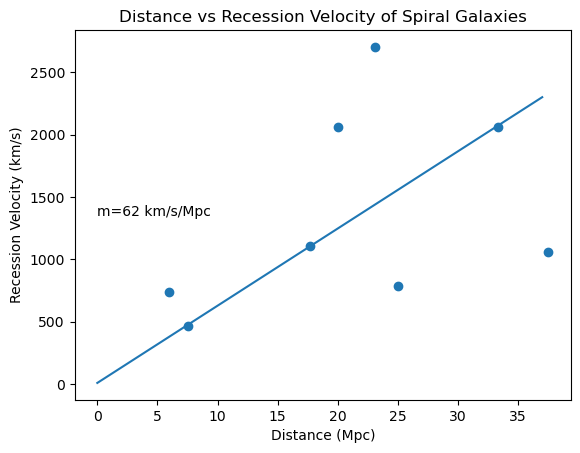

In [14]:
# Plotting test data:

plt.figure()
x = test_df.loc[:, 'distances']
y = test_df.loc[:, 'recession velocity']
plt.scatter(x, y)
# plt.errorbar(x, y, yerr=c, fmt="o")
plt.xlabel('Distance (Mpc)')
plt.ylabel('Recession Velocity (km/s)')
plt.title('Distance vs Recession Velocity of Spiral Galaxies')
# plt.errorbar(x, y)

x_fit = np.arange(37.5)
m = 62
b = 7
y_fit = m*x_fit + b
plt.plot(x_fit, y_fit)
plt.text(0, 1350, r'm=62 km/s/Mpc')

plt.show()

In [15]:
# There should be a linear relationship between distance and the recessional velocity, and the slope is H_0. 

def f(x, m): 
    return m*x

parameters, covariance_matrix = fit.curve_fit(f, x, y)
print(parameters)
print(covariance_matrix)

[57.88397427]
[[145.25234929]]


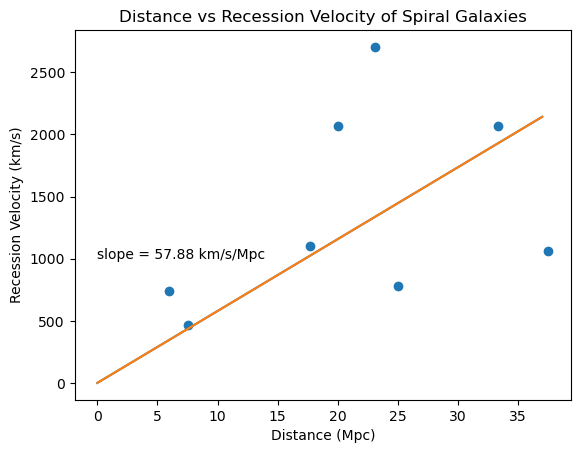

Hubble's Constant (H0) = 57.88397427 ± 12.052068257702366


In [16]:
# Replotting the data with fitted curve.

plt.figure()
x = test_df.loc[:, 'distances']
y = test_df.loc[:, 'recession velocity']
plt.scatter(x, y)
# There are no errorbars on these points since the error was not given in the data. 
plt.xlabel('Distance (Mpc)')
plt.ylabel('Recession Velocity (km/s)')
plt.title('Distance vs Recession Velocity of Spiral Galaxies')

x_fit = np.arange(37.5)
m = 57.88397427
y_fit = m*x_fit
plt.plot(x_fit, y_fit)
plt.errorbar(x_fit, y_fit)
plt.text(0, 1000, r'slope = 57.88 km/s/Mpc')
plt.show()

# Error of curve fit:
m_error = covariance_matrix[0,0] ** 0.5
# print('m error:', m_error)
print("Hubble's Constant (H0) =", m, "\u00B1", m_error)

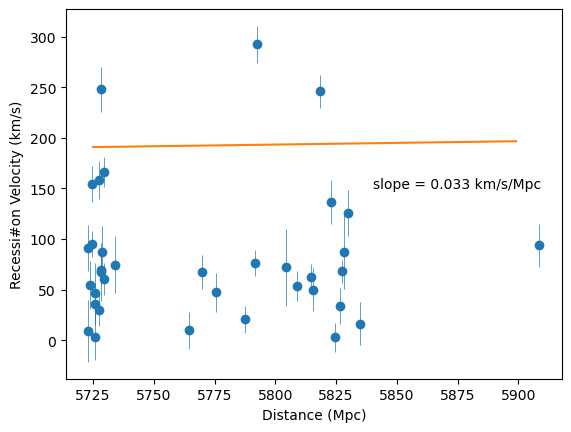

Hubble's Constant (H0) = 0.03333333333333333 ± 0.0019954775244370062


In [25]:
# The model works when graphed, so now the real data will be graphed:

plt.figure()
x = df.loc[:, 'distances']
y = df.loc[:, 'recession velocity']
y_error = df.loc[:, 'recession velocity error']
plt.errorbar(x, y, yerr = y_error, fmt="o", linewidth = 0.5)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Recessi#on Velocity (km/s)')
# plt.xlim(xmin = 0)
# plt.xticks(np.arange(0, 6200, + 1))
# plt.autoscale(enable=True, axis='both')

# Initial curve fit
x_fit = np.arange(5725, 5900)
m = 1/30 #this has to be a reciprical because the data is from ~5725 to ~5900
y_fit = m * x_fit
plt.errorbar(x_fit, y_fit)
plt.text(5840, 150, r'slope = 0.033 km/s/Mpc')

# plt.autoscale(enable=True, axis='both')

plt.show()

#Error of curve fit:
m_error = covariance_matrix[0,0] ** 0.5
# print('m error:', m_error)
print("Hubble's Constant (H0) =", m, "\u00B1", m_error)

In [18]:
# Curve fitting:

def f(x, m): 
    return m*x


parameters, covariance_matrix = fit.curve_fit(f, x, y)
print(parameters)
print(covariance_matrix)

[0.0144999]
[[3.98193055e-06]]


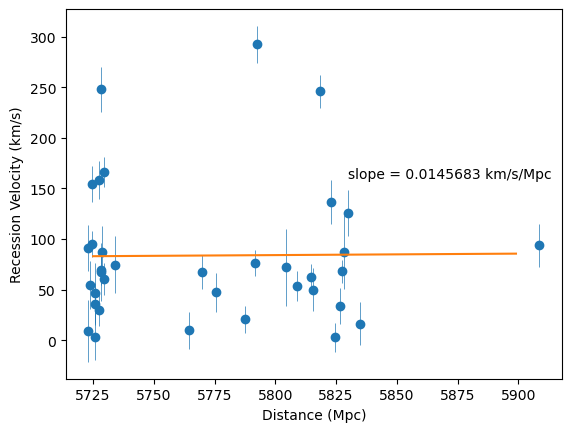

Hubble's Constant (H0) = 0.014499898582733406 ± 0.0019954775244370062


In [29]:
# Replotting with refined curve fit:

plt.figure()
x = df.loc[:, 'distances']
y = df.loc[:, 'recession velocity']
y_error = df.loc[:, 'recession velocity error']
plt.errorbar(x, y, yerr = y_error, fmt="o", linewidth = 0.5)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Recession Velocity (km/s)')

# Initial curve fit
x_fit = np.arange(5725, 5900)
m = parameters #this has to be a reciprical because the data is from ~5725 to ~5900
y_fit = m * x_fit
plt.errorbar(x_fit, y_fit)
plt.text(5830, 160, r'slope = 0.0145683 km/s/Mpc')
plt.show()

print("Hubble's Constant (H0) =", float(m), "\u00B1", m_error)

m_error = covariance_matrix[0,0] ** 0.5
# print('m error =', m_error)

In [21]:
# Rerunning the model with a different galaxy size to see if that's producing the error. 

In [22]:
# Model run 2; Calculating the distance and recession velocity for each galaxy from the filtered data:

# Spiral galaxies range from 5 kpc up to 100 kpc. So, 5 is the lower bound:
actual_size_of_galaxy = 5 #kiloparsecs
distances = []
recession_velocity_list = []
recession_velocity_error_list = []
c = 299792.458 #km/s 

for i in range(len(data2['TARGETID'])):
    pixels = data2['NPIXELS'][i]
#     print(pixels)
    arcseconds = pixels * 1.18
#     print(arcseconds, 'arcsec')
    theta = arcseconds * (0.00484814/11800) #miliradians
#     print(theta, 'milirad')
    distance = actual_size_of_galaxy / theta
#     print(distance, 'Mpc')
    distances.append(distance) #Makes a list with all the distance values.
    #Hubble's Law: v = z*c; c = speed of light (299,792,458 m/s)
    recession_velocity = (data2['Z'][i]) * (c)
    recession_velocity_error = (data2['ZERR'][i]) *(c)
    recession_velocity_list.append(recession_velocity)
    recession_velocity_error_list.append(recession_velocity_error)
    i = i + 1
# print(distances, 'Mpc')
# print(recession_velocity_list, 'km/s')

dictionary = {'distances':distances, 'recession velocity': recession_velocity_list, 
              'recession velocity error':recession_velocity_error_list}
df2 = pd.DataFrame(data = (dictionary), columns = ('distances', 'recession velocity', 'recession velocity error'))
df2

distances  recession velocity  recession velocity error
0   1323.736815            2.952539                 14.223646
1   1302.175951          166.380922                 15.029140
2   1342.868949           93.949664                 21.202872
3   1324.927226          125.919802                 22.815642
4   1311.282076           67.621816                 17.025025
5   1316.302939           76.712199                 12.845217
6   1312.617224           47.285058                 19.481534
7   1301.847201           69.538726                 14.972353
8   1319.165199           72.037645                 38.332861
9   1301.847201          247.780130                 22.604911
10  1324.246729           33.881832                 18.015177
11  1316.470964          292.368359                 18.229155
12  1301.847201           67.338700                 28.796066
13  1324.416788           67.967204                 11.065914
14  1300.861949           54.363497                 23.531373
15  1324.586890           86.917913                 36.818107
16  1322.378963          245.981620                 16.415268
17  1321.701080           49.820136                 21.107832
18  1321.531718           62.336493                 12.596197
19  1326.119780           16.153254                 21.152371
20  1301.682889          158.023954                 18.950685
21  1301.682889           30.143108                 15.878430
22  1301.026054          154.380007                 18.038762
23  1301.354388           35.567217                 20.603250
24  1301.354388           46.679368                 29.532150
25  1303.163195           74.682696                 27.892293
26  1301.026054           95.140753                 12.537104
27  1302.011555           87.575534                 24.926711
28  1323.397091          136.586378                 21.768681
29  1300.697885            9.248664                 30.728352
30  1300.697885           91.043987                 22.912918
31  1302.175951           60.279667                 15.992455
32  1301.354388            2.952109                 22.739213
33  1320.178383           53.262312                 14.723206
34  1315.295693           20.552438                 13.684215
35  1310.116048            9.708031                 18.564115

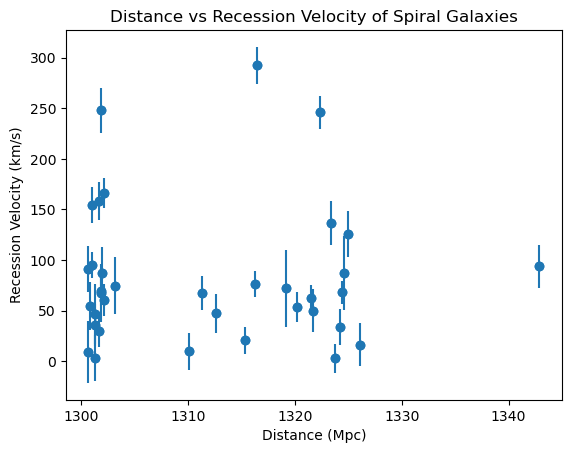

In [23]:
# Plotting model run 2 data:

plt.figure()
x = df2.loc[:, 'distances']
y = df2.loc[:, 'recession velocity']
y_error = df2.loc[:, 'recession velocity error']
plt.scatter(x, y)
plt.errorbar(x, y, yerr= y_error, fmt="o")
plt.xlabel('Distance (Mpc)')
plt.ylabel('Recession Velocity (km/s)')
plt.title('Distance vs Recession Velocity of Spiral Galaxies')
plt.show()

In [24]:
#No improvement in correlation. 